In [1]:
import pandas as pd
from pybaseball import pitching_stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
players = pd.read_csv('../data/input/cleaned_knuckleballers_with_ids.csv')

In [3]:
start_yr = 1947
all_stats = pd.DataFrame()
for i in range(1947,2024):
    season_stats = pitching_stats(i,i,qual=0)
    all_stats = pd.concat([all_stats, season_stats])

In [4]:
all_stats.shape

(35637, 334)

In [5]:
players['knuckleballer'] = 1
fg_ids = players[['key_fangraphs','knuckleballer']].rename(columns={'key_fangraphs':'IDfg'})
pitcher_games = all_stats[['IDfg','Season','Name','G','GS']].merge(fg_ids, how='left', on='IDfg')
pitcher_games['knuckleballer'] = pitcher_games['knuckleballer'].fillna(0)

In [6]:
pitcher_games.to_csv('../data/output/pitcher_games_data.csv', index=False)

In [7]:
games_data = pitcher_games.groupby(['Season','knuckleballer'])['G'].sum().reset_index()
games_data = games_data.pivot(index='Season', columns='knuckleballer', values='G').fillna(0)

games_data['knuckleball_pct'] = 100*games_data[1.0]/games_data[[0.0,1.0]].sum(axis=1)
games_data.head()

knuckleballer,0.0,1.0,knuckleball_pct
Season,,,
1947,5880.0,200.0,3.289474
1948,5921.0,227.0,3.692258
1949,5071.0,231.0,4.356846
1950,5018.0,228.0,4.346169
1951,5115.0,217.0,4.069767


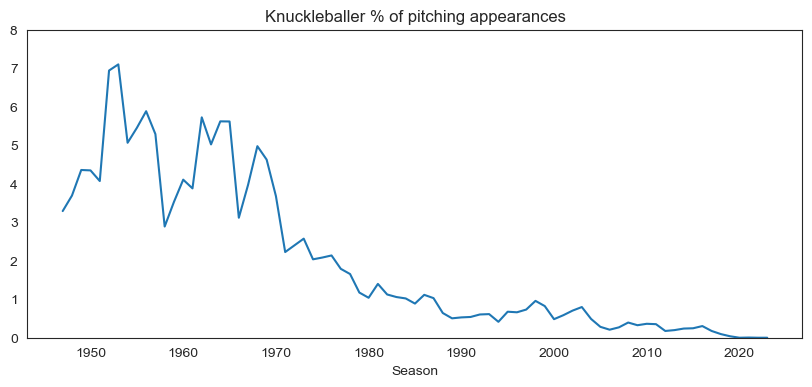

In [8]:
plt.rcParams['figure.figsize'] = (10,4)
games_data['knuckleball_pct'].plot()
plt.title("Knuckleballer % of pitching appearances")
plt.ylim(0,8)
plt.show()  